In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")
y_testset = pd.read_csv("gender_submission.csv")

In [323]:
def concat_df(trainset ,testset):
    return pd.concat([trainset , testset]).reset_index(drop=True)

In [284]:
df_all = concat_df(trainset, testset)
df_all.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [285]:
print(f"Train shape: {trainset.shape}")

Train shape: (891, 12)


In [286]:
print(f"Test shape: {testset.shape}")

Test shape: (418, 11)


In [287]:
trainset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [288]:
testset.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [289]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [290]:
trainset.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

# Visulation initiale 

<AxesSubplot:>

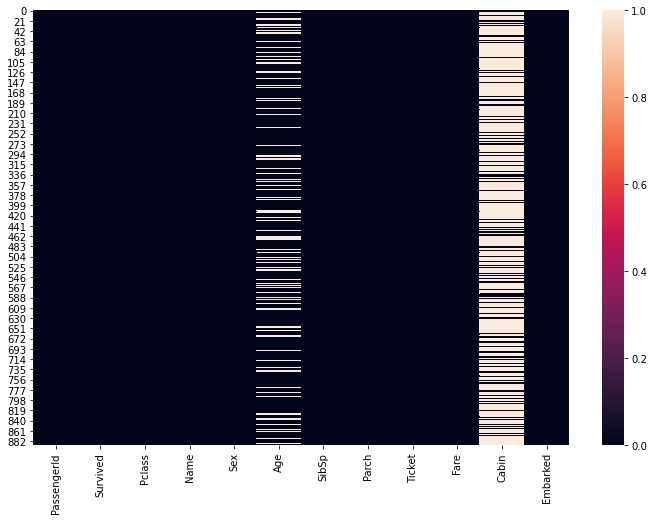

In [291]:
plt.figure(figsize=(12, 8))
sns.heatmap(trainset.isna())

In [292]:
(trainset.isna().sum()/trainset.shape[0]).sort_values()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

In [293]:
(testset.isna().sum()/testset.shape[0]).sort_values()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.000000
Fare           0.002392
Age            0.205742
Cabin          0.782297
dtype: float64

 ---> la colonne Cabine est inutile (beaucoup de NAN)

In [294]:
print("Total Alives: %3d" % len(trainset[trainset['Survived'] == 1]))
print("Total Deads : %3d" % len(trainset[trainset['Survived'] == 0]))

Total Alives: 342
Total Deads : 549


C:\Users\benno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


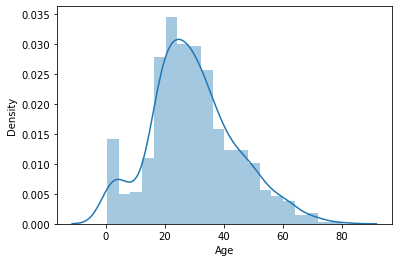

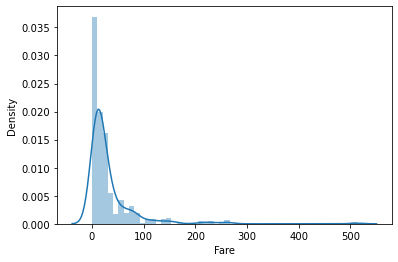

In [295]:
for col in trainset.select_dtypes('float'):
    plt.figure()
    sns.distplot(trainset[col])

In [51]:
mort_df = trainset[trainset["Survived"] == 0]
survivre_df = trainset[trainset["Survived"] == 1]

C:\Users\benno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

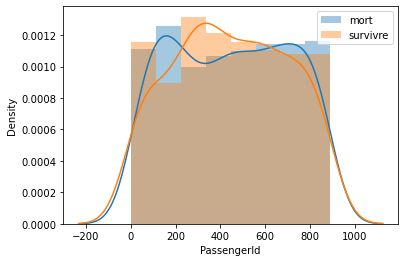

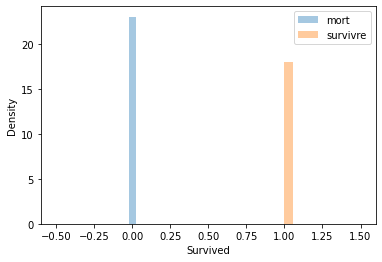

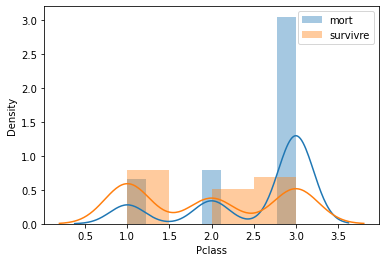

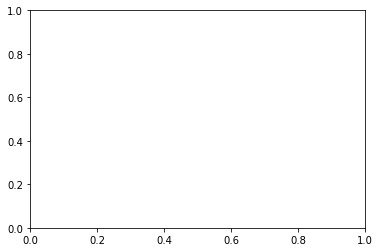

In [49]:
for col in trainset:
    plt.figure()
    sns.distplot(mort_df[col], label='mort')
    sns.distplot(survivre_df[col], label='survivre')
    plt.legend()

C:\Users\benno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

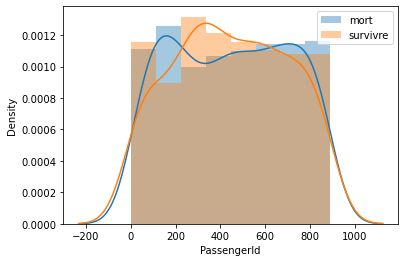

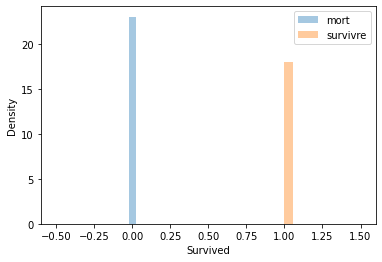

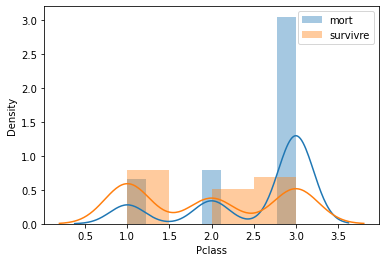

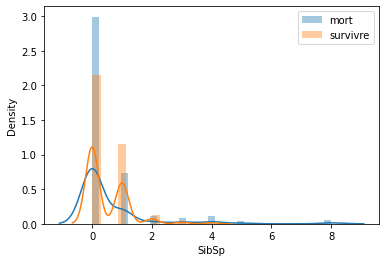

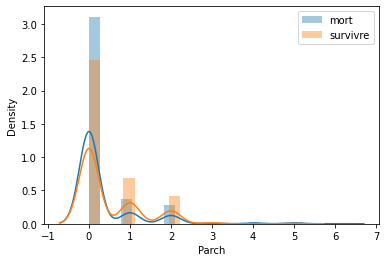

In [298]:
for col in trainset.select_dtypes('int64'):
    plt.figure()
    sns.distplot(mort_df[col], label='mort')
    sns.distplot(survivre_df[col], label='survivre')
    plt.legend()

<AxesSubplot:>

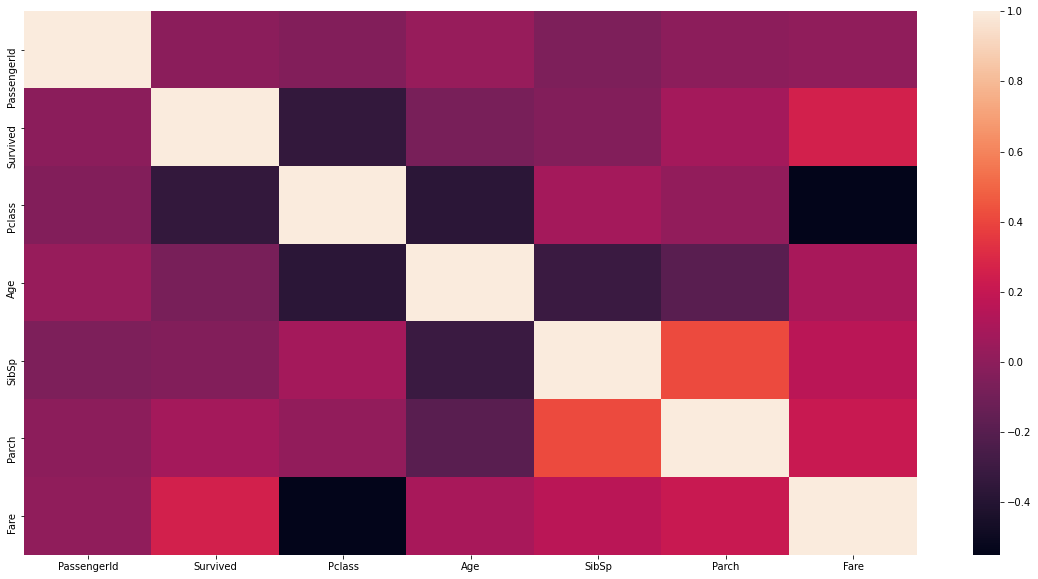

In [299]:
plt.figure(figsize=(20, 10))
sns.heatmap(trainset.corr())

<ipython-input-300-dc85a3328600>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


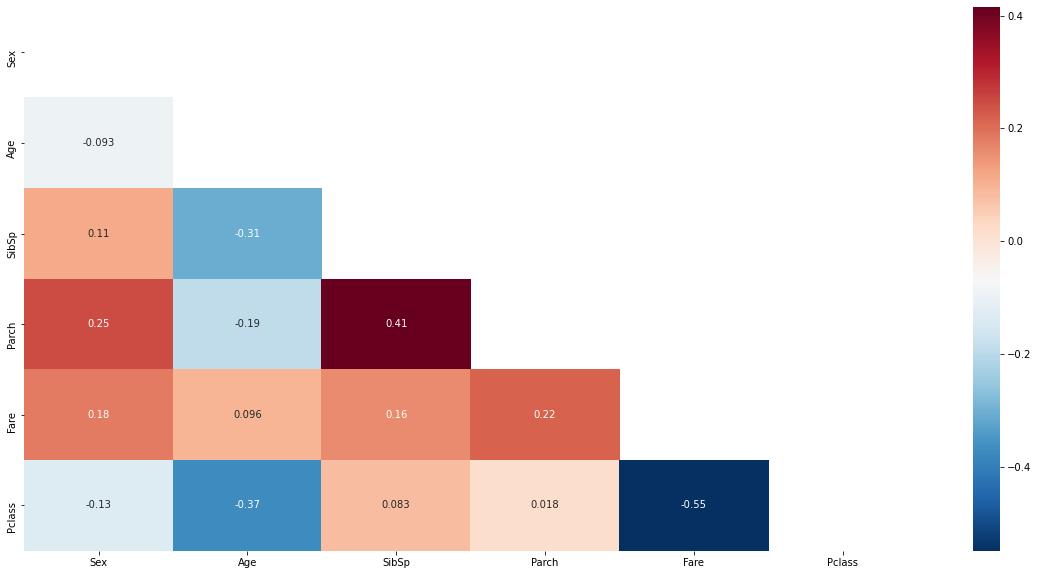

In [300]:
df = trainset[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
corr = df.corr()   
mask = np.triu(np.ones_like(corr, dtype=np.bool))    
plt.figure(figsize=(20, 10))   
sns.heatmap(corr, mask=mask, cmap='RdBu_r',annot=True)
plt.show()

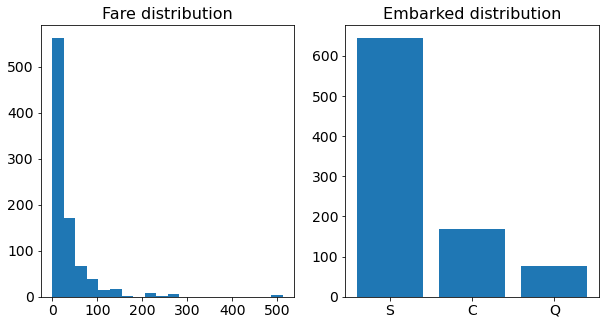

In [301]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(trainset["Fare"], bins=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Fare distribution", fontsize=16)

plt.subplot(1, 2, 2)
embarked_info = trainset["Embarked"].value_counts()
plt.bar(embarked_info.index, embarked_info.values)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Embarked distribution", fontsize=16);


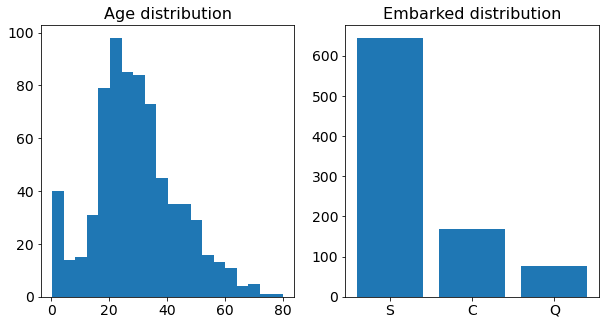

In [302]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(trainset["Age"], bins=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Age distribution", fontsize=16)

plt.subplot(1, 2, 2)
embarked_info = trainset["Embarked"].value_counts()
plt.bar(embarked_info.index, embarked_info.values)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Embarked distribution", fontsize=16);

In [180]:
def bar_chart(feature):
    survived = trainset[trainset['Survived']==1][feature].value_counts()
    dead = trainset[trainset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

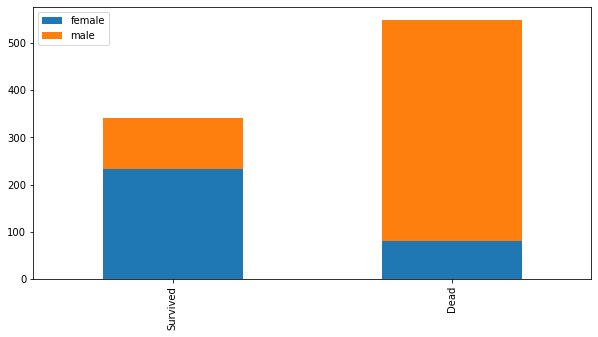

In [181]:
bar_chart('Sex')

#### --> Le graphique confirme que les femmes ont plus de chances de survivre que les hommes

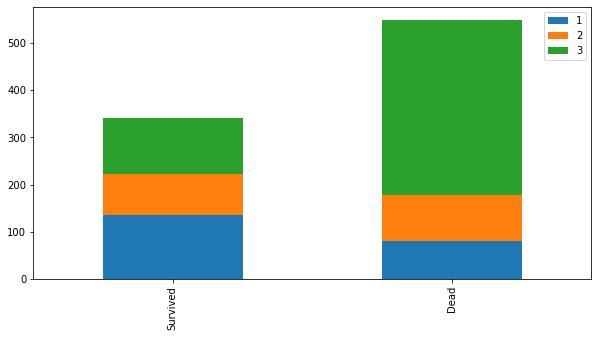

In [182]:
bar_chart('Pclass')

#### --> Le graphique confirme que la 1re classe a plus de chances de survivre que les autres classes
#### --> Le graphique confirme que la 3e classe est plus probablement morte que les autres classes

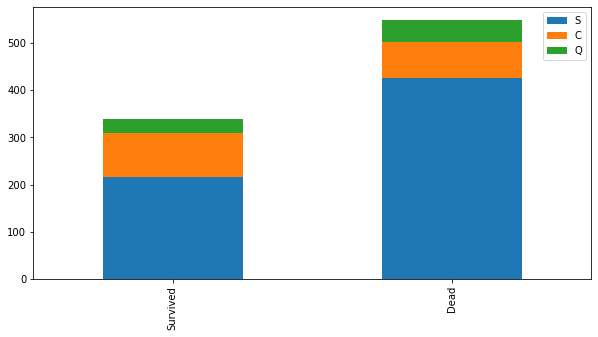

In [183]:
bar_chart('Embarked')

#### --> Le graphique confirme qu'une personne à bord de C a légèrement plus de chances de survivre
#### --> Le graphique confirme qu'une personne à bord de Q est probablement décédée
#### --> Le graphique confirme qu'une personne à bord de S est probablement déc"dée

## Conclusion :
    Le Titanic a coulé de la proue du navire où se trouvaient des salles de troisième classe
    conclusion, Pclass est une caractéristique clé du classificateur

# PRE-PROCESSING

In [12]:
train_df = trainset.copy()
test_df = testset.copy()

In [13]:
print("Median for Age seperated by Pclass :")
display(train_df.groupby("Pclass")["Age"].median())
print("Median for Age seperated by Pclass and Sex :")
display(train_df.groupby(["Pclass", "Sex"])["Age"].median())
print("Number of cases :")
display(train_df.groupby(["Pclass", "Sex"])["Age"].count())

Median for Age seperated by Pclass :


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for Age seperated by Pclass and Sex :


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Number of cases :


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [14]:
#Extraire les titres des personnes de leurs noms
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.')
train_df['Title'] = train_df['Title'].replace(['Ms', 'Mlle'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Dr', 'Major', 'Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')
train_df = train_df.drop(['Name'], axis=1)

In [15]:
#Extraire les titres des personnes de leurs noms
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.')
test_df['Title'] = test_df['Title'].replace(['Ms', 'Mlle'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Dr', 'Major', 'Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')
test_df = test_df.drop(['Name'], axis=1)

In [16]:
train_df.loc[train_df["Embarked"].isnull(), "Embarked"] = "S"

In [17]:
def encodage(df):
    code = {'male':0,
            'female':1,
            'Mr':0,
            'Miss':1,
            'Mrs':2,
            'Master':3,
            'C':0,
            'Q':1,
            'S':2}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    
    
    #FamilySize - total number of family members in the ship
    #IsAlone - the person has some family or traveled alone
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
    
    return df

In [18]:
def nettoyage(df):
    df = df.drop(["PassengerId", "Cabin", "Ticket"], axis=1)
    #Remplissons la colonne Embarqué avec plus fréquemment la valeur "S"
    
    #remplacer les valeurs manquantes (Age) par les médianes
    df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].apply(lambda x: x.fillna(x.median()))
    df["Fare"].fillna(df["Fare"].mean(), inplace=True)
    return df

In [19]:
def preprocessing(df):
    
    df = encodage(df)
    df = nettoyage(df)
    
    return df

In [20]:
train_df = preprocessing(train_df)

In [21]:
test_df = preprocessing(test_df)

In [22]:
train_df.dtypes.value_counts()

int64      9
float64    2
dtype: int64

In [23]:
print(train_df.isna().sum(), "\n")
test_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64 



Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64

# Modellisation

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [133]:
X_train = train_df.drop('Survived', axis=1)
y_train= train_df['Survived']

In [134]:
X_test = test_df
y_test = y_testset["Survived"]

In [135]:
model_1 = DecisionTreeClassifier(random_state=0)

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
}

model_1 = GridSearchCV(
    model_1, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

In [136]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

# KNN

In [137]:
model_1 = KNeighborsClassifier(n_neighbors = 15)

[[197  69]
 [ 67  85]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       266
           1       0.55      0.56      0.56       152

    accuracy                           0.67       418
   macro avg       0.65      0.65      0.65       418
weighted avg       0.68      0.67      0.68       418



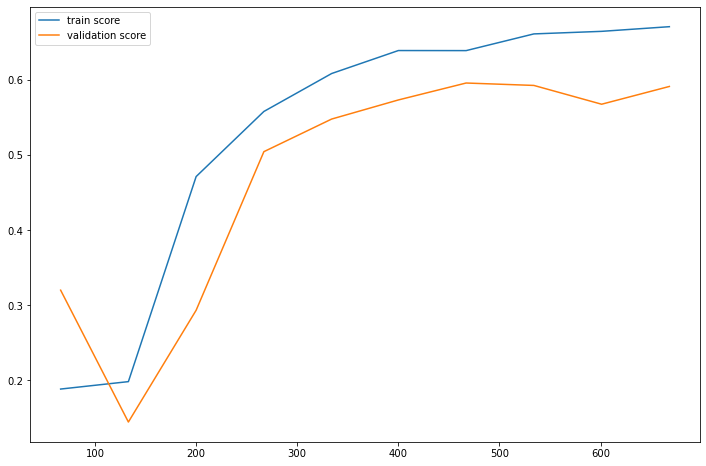

In [138]:
evaluation(model_1)

# Decision Tree

In [139]:
model_2 = DecisionTreeClassifier(random_state=0)

[[205  61]
 [ 33 119]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       266
           1       0.66      0.78      0.72       152

    accuracy                           0.78       418
   macro avg       0.76      0.78      0.77       418
weighted avg       0.79      0.78      0.78       418



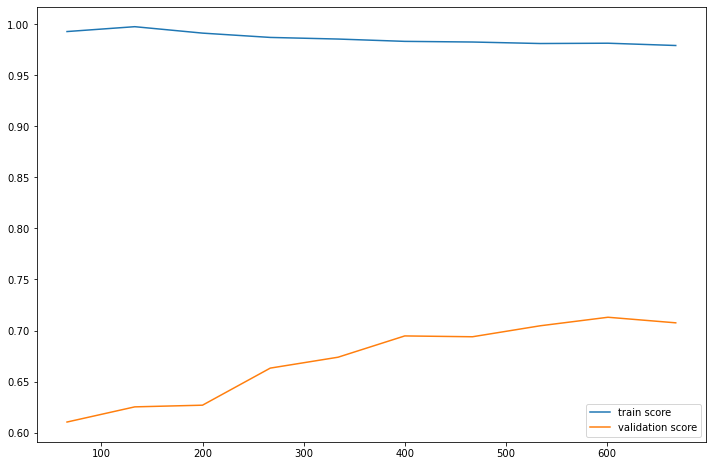

In [140]:
evaluation(model_2)

# Ramdom Forest

In [164]:
model_3 = RandomForestClassifier(random_state=0,n_estimators=13)

[[224  42]
 [ 29 123]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       266
           1       0.75      0.81      0.78       152

    accuracy                           0.83       418
   macro avg       0.82      0.83      0.82       418
weighted avg       0.83      0.83      0.83       418



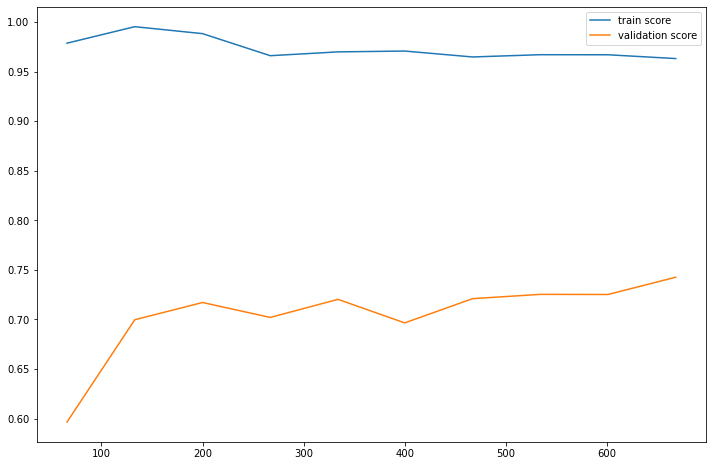

In [165]:
evaluation(model_3)

# SVM

In [166]:
model_4 = SVC(random_state=0) 

[[233  33]
 [110  42]]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       266
           1       0.56      0.28      0.37       152

    accuracy                           0.66       418
   macro avg       0.62      0.58      0.57       418
weighted avg       0.64      0.66      0.62       418



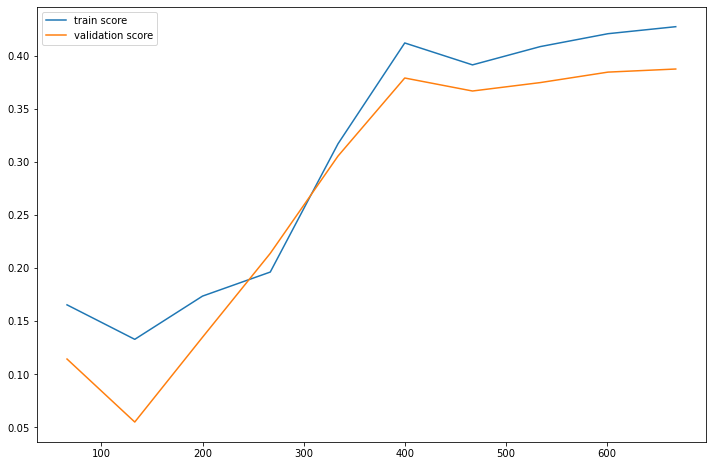

In [167]:
evaluation(model_4)